# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Load FBM transformed dataset

In [4]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/data/fig1b_fbm_scaled_gex_updated_dr_20210104.h5ad")

In [5]:
cell_numbers = adata.obs.groupby(["broad_fig1_cell.labels"]).apply(len)
cell_numbers

broad_fig1_cell.labels
HSC_MPP          3795
erythroid       26407
MK               2624
B_lineage       28583
DC               2459
eo/baso/mast     1108
neutrophil      10486
monocyte        20038
T_NK             1349
stroma           6379
dtype: int64

# Run the dotplots

In [6]:
genes = ['CD34', 'SPINK2', 'PRSS57', 'ALAS2', 'GYPA', 'KLF1', 'GP9', 'PLEK', 'ITGA2B', 'VPREB1', 'IGLL1', 'CD79A', 
        'CLEC10A', 'CD1C', 'HLA-DPA1', 'GATA2', 'HDC', 'PRG2', 'NCF1', 'ITGAM', 'PGLYRP1', 'CD14', 'CD68', 'CD52', 
        'CD3E', 'TRBC1', 'GZMA', 'MMP9', 'KDR', 'CTHRC1']

In [7]:
adata.obs["broad_fig1_cell.labels"] = adata.obs["broad_fig1_cell.labels"].cat.reorder_categories(['HSC_MPP', 
            'erythroid', 'MK', 'B_lineage', 'DC', 'eo/baso/mast', 'neutrophil', 'monocyte', 'T_NK', 'stroma'])

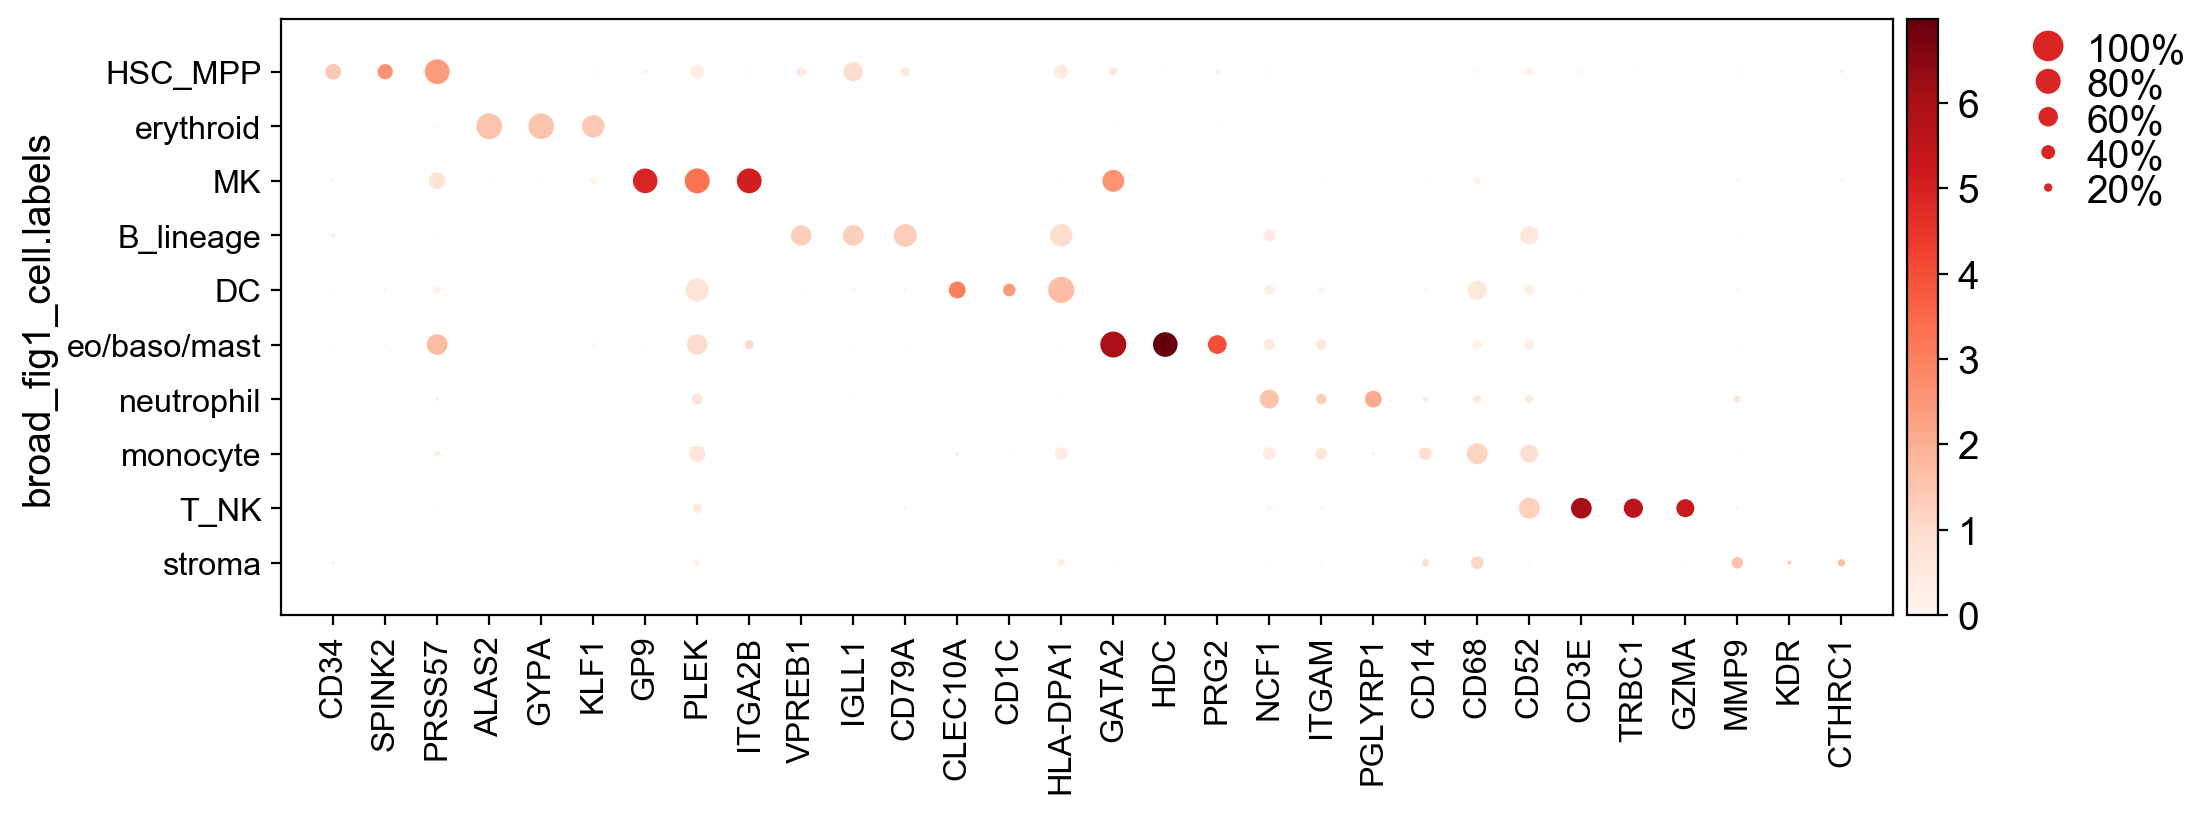

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[10.5, 0, 0.2, 0.5, 0.25])

In [8]:
sc.settings.set_figure_params(dpi=100, dpi_save=1000)
sc.pl.dotplot(adata, var_names=genes, save="fig1d_overall_broad_dotplot_20210104.pdf", 
              groupby="broad_fig1_cell.labels", use_raw=False)